# Part I - Prosper Loan Data Exploration
### by Tristen Wallace

## Preliminary Wrangling Assessment

In [135]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import custom_funcs

%matplotlib inline

In [136]:
# Load dataset
file_path = '../data/prosperLoanData.csv'
df = pd.read_csv(file_path)

#Data structure
print(df.shape)

#Preview data
df.sample(5)


(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
50691,BB8A359528320072915D9EA,1037076,2013-11-18 07:53:42.947000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,...,-9.90,0.0,0.0,0.0,0.0,1.0,0,0,0.0,25
66921,315D3590196009609516346,939275,2013-10-06 12:25:31.787000000,NaN,60,Current,NaN,0.19988,0.1760,0.1660,...,-16.59,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
97817,73533601738550462C4BC37,1216602,2014-02-17 15:15:45.563000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,221
28399,F33A3430507818509BEAAAF,393103,2008-09-04 15:30:03.570000000,A,36,Completed,2011-02-15 00:00:00,0.16446,0.1501,0.1401,...,-168.48,0.0,0.0,0.0,0.0,1.0,0,0,0.0,134
43257,D1F63556566085096D4C7DE,629842,2012-08-26 21:57:32.537000000,NaN,36,Past Due (1-15 days),NaN,0.35797,0.3177,0.3077,...,-30.11,0.0,0.0,0.0,0.0,1.0,0,0,0.0,15


In [137]:
# Review variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [138]:
# Review daterange
df.describe()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


**Dimensionality Reduction:** We don't need many of these columns so we will create a subset with only the columns/features that interest us for this project.

In [139]:
# Varaibles of interest
cols = ['LoanStatus', 'Term', 'CreditGrade', 'BorrowerAPR',
        'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
        'IsBorrowerHomeowner', 'GroupKey', 'DebtToIncomeRatio', 'IncomeRange', 'ListingNumber', 'ProsperPrincipalBorrowed',
        'ProsperPrincipalOutstanding', 'LoanOriginalAmount', 'LoanOriginationDate', 'MemberKey', 'InvestmentFromFriendsCount', 
        'InvestmentFromFriendsAmount', 'Investors']

df_sub = df[cols]

# Descriptive statistics
df_sub.describe()


,Term,BorrowerAPR,ListingCategory (numeric),DebtToIncomeRatio,ListingNumber,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000000,113912.000000,113937.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,2.774209,0.275947,6.278857e+05,8472.311961,2930.313906,8337.01385,0.023460,16.550751,80.475228
std,10.436212,0.080364,3.996797,0.551759,3.280762e+05,7395.507650,3806.635075,6245.80058,0.232412,294.545422,103.239020
min,12.000000,0.006530,0.000000,0.000000,4.000000e+00,0.000000,0.000000,1000.00000,0.000000,0.000000,1.000000
25%,36.000000,0.156290,1.000000,0.140000,4.009190e+05,3500.000000,0.000000,4000.00000,0.000000,0.000000,2.000000
50%,36.000000,0.209760,1.000000,0.220000,6.005540e+05,6000.000000,1626.550000,6500.00000,0.000000,0.000000,44.000000
75%,36.000000,0.283810,3.000000,0.320000,8.926340e+05,11000.000000,4126.720000,12000.00000,0.000000,0.000000,115.000000
max,60.000000,0.512290,20.000000,10.010000,1.255725e+06,72499.000000,23450.950000,35000.00000,33.000000,25000.000000,1189.000000


In [140]:
# Rename variables
df_sub = df_sub.rename(columns={'ProsperRating (Alpha)':'ProsperRating',
                        'ListingCategory (numeric)':'ListingCategory'})

In [141]:
# Check for missing values
df_sub.isnull().sum().sort_values(ascending=False)

GroupKey                       100596
ProsperPrincipalOutstanding     91852
ProsperPrincipalBorrowed        91852
CreditGrade                     84984
ProsperRating                   29084
DebtToIncomeRatio                8554
BorrowerState                    5515
Occupation                       3588
EmploymentStatus                 2255
BorrowerAPR                        25
InvestmentFromFriendsAmount         0
InvestmentFromFriendsCount          0
MemberKey                           0
LoanOriginationDate                 0
LoanOriginalAmount                  0
LoanStatus                          0
ListingNumber                       0
IncomeRange                         0
Term                                0
IsBorrowerHomeowner                 0
ListingCategory                     0
Investors                           0
dtype: int64

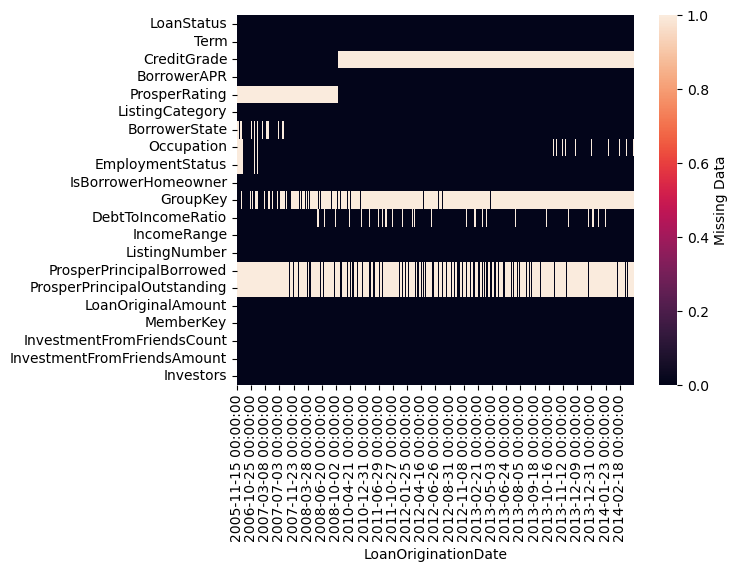

In [142]:
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

sns.heatmap(df_sub.set_index('LoanOriginationDate').sort_index().isna().transpose(),
            cbar_kws={'label':'Missing Data'});

In [143]:
# Descriptive statistics of loans where at least one friend invested
df_sub.query('InvestmentFromFriendsCount > 1').describe() 


,Term,BorrowerAPR,ListingCategory,DebtToIncomeRatio,ListingNumber,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,296.000000,296.000000,296.000000,240.000000,2.960000e+02,72.000000,72.000000,296.000000,296.000000,296.000000,296.000000
mean,36.324324,0.176282,1.939189,0.450500,3.234413e+05,8323.430556,2286.484306,8362.452703,2.831081,1570.096655,145.716216
std,3.407303,0.085295,2.138355,1.408578,1.467491e+05,7449.745102,2900.049803,6726.983332,2.609990,2627.150381,126.895048
min,12.000000,0.056720,0.000000,0.010000,1.001990e+05,1000.000000,0.000000,1000.000000,2.000000,55.000000,2.000000
25%,36.000000,0.105910,0.000000,0.110000,2.293972e+05,2500.000000,0.000000,3181.250000,2.000000,221.832500,54.500000
50%,36.000000,0.158825,1.000000,0.215000,3.303085e+05,5225.000000,1160.355000,5750.000000,2.000000,551.980000,104.500000
75%,36.000000,0.223510,3.000000,0.350000,3.964090e+05,11250.000000,3544.612500,10500.000000,3.000000,1500.000000,207.000000
max,60.000000,0.374530,7.000000,10.010000,1.063442e+06,30000.000000,13568.900000,25000.000000,33.000000,23699.520000,667.000000


In [144]:
# Check unique income ranges
df_sub.IncomeRange.value_counts()

IncomeRange
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: count, dtype: int64

In [145]:
# Check counts for unique term lengths
df_sub.Term.value_counts()

Term
36    87778
60    24545
12     1614
Name: count, dtype: int64

In [146]:
# Check counts for unique loan statuses
df_sub.LoanStatus.value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

In [147]:
# Check counts for unique employment statuses
df_sub.EmploymentStatus.value_counts()

EmploymentStatus
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: count, dtype: int64

In [148]:
df_sub.query('EmploymentStatus == "Not available"')['IncomeRange']


2         Not displayed
17        Not displayed
42        Not displayed
63        Not displayed
76        Not displayed
              ...      
113797    Not displayed
113819    Not displayed
113825    Not displayed
113848    Not displayed
113926    Not displayed
Name: IncomeRange, Length: 5347, dtype: object

In [149]:
# Check unique occupation values
df_sub.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [150]:
# How many different occupations?
df_sub.Occupation.unique().size

68

In [151]:
# Compare credit grade and Prosper rating
print(df_sub.ProsperRating.unique())
print(df_sub.CreditGrade.unique())

[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']


> After assessing our variables of interest it's clear that we have several cleaning tasks to perform:

1. Our analysis doesn't require the granularity present in `LoanStatus`. We can combine the past due category and combine 'FinalPaymentInProgress' with 'Completed'.

2. `IncomeRange` 'Not displayed' rows should be removed along with missing values.

3. `EmploymentStatus` 'Not available' rows should be removed along with missing values.

4. Our analysis doesn't require the granularity present in `Occupation`. We can group occupations into smaller categories using ISCO grouping standards.

5. Based on the heatmap and their unique values comparison, we can see the `CreditGrade` and `ProsperRating` store the same variables. The two can be melted into one column using the ranking scheme AA - HR.

6. 19.4% of borrowers had exisiting loan balances with Prosper at the time of new loan origination. These pre-existing loan totals are stored in `ProsperPrincipalBorrowed` and `ProsperPrincipalOutstanding`. While in missing value assessment these variables appear to have 80.6% NaN values and qualify for removal, descriptive statistics show that the 19.4% of values have a meaningful value size to warrant keeping them. To deal with the missing values, we can engineer new 'TotalBorrowed' and 'TotalOutstanding' variables by combining the variables above with LoanOriginalAmount. 

4. Remove unnecessary variables:
    - Group Key: Contains more than 70% NaN
    - IsBorrowerHomeowner, MemberKey: Not needed for our analysis


## Data Cleaning

### Remove unnecessary variables

In [152]:
df_sub.drop(['GroupKey', 'IsBorrowerHomeowner', 'MemberKey'], axis=1, inplace=True)

### Group Occupation Categories

In [171]:
for index, row in df_sub.iterrows():
    df_sub.at[index, 'Occupation'] = custom_funcs.map_occupation_to_isco(row['Occupation'])

In [170]:
isco = ['Professionals', 'Clerical Support', 'Managers', 'Service/Sales',
        'Craft Workers', 'Other', 'Technicians', 'Skilled Agr/Forestry',
        'Operators/Assemblers', 'Armed Forces', 'Elementary']

# Test Occupations were converted
assert(all((df_sub.Occupation.value_counts().index == isco)))
